# Programming for Data Science and Artificial Intelligence

## Supervised Learning - Classification - Naive Bayesian - Gaussian

### Readings: 
- [VANDER] Ch5
- [HASTIE] Ch6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Naive Bayesian Classification

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities as:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.

Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.  Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.  The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in.  It makes two idiotic assumptions:

1. The probability of each feature is independent, thus we can simply multiply these probabilities.  Thus we can do 
$$P({\rm features}~|~L_1) = P({\rm feature_1}~|~L_1) * P({\rm feature_2}~|~L_1) * \cdots P({\rm feature_n}~|~L_1)$$
2. The probability distribution of the feature is assumed to belong to some distribution.  For example, if we make the assumption that the feature belongs to Gaussian distribution, then $P({\rm features}~|~L_1)$ is computed using the probability density function (pdf) of Gaussian distribution which returns the likelihood, where the gaussian pdf looks something like this
$$ \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$



Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

Today, we shall explore two forms of naive classification using two different assumptions: (1) Gaussian, and (2) Multinomial.

## Gaussian Naive Classification

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(y | x)$ (also known as **posteriors**).
Bayes's theorem tells us how to express this in terms of quantities as:

$$
P(y|x) = \frac{P(x|y)P(y)}{P(x)}
$$

Thus, if we know all these three terms on the right, we can find $P(y \mid x)$

$P(y)$ (also known as **priors**) is simply

$$P(y = 1) = \frac{\Sigma_{i=1}^m 1(y=1)}{m}$$

$$P(y = 0) = \frac{\Sigma_{i=1}^m 1(y=0)}{m}$$

$P(x \mid y)$ (also known as **likelihoods** or **conditional probability**) is a little bit tricky but if we are willing to make a "naive" assumption, then we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.  Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.  In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution* as follows:

$$ P(x \mid y=1 ; \mu_1, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_1)^{2}}{2\sigma^{2}}}$$
$$ P(x \mid y=0 ; \mu_0, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_0)^{2}}{2\sigma^{2}}}$$

Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.

**Implementation steps:**

1. Prepare your data
    - $X$ and $y$ in the right shape
        - $X$ -> $(m, n)$
        - $y$ -> $(m,  )$
        - Note that theta is not needed.  Why?
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Calculate the mean and std of each feature for each class.  For example, the mean of feature $j$ when $y=0$ is
    $$\mu_{0j} = \frac{\Sigma_{i=1}^m x_{ij}}{m} $$
   Thus the shape of your mean and std will be <code>(n, 2)</code> or more generally <code>(n, k)</code>
3. Calculate the **likelihoods** of each sample of each feature using

    $$ P(x \mid y=1 ; \mu_1, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_1)^{2}}{2\sigma^{2}}}$$
    $$ P(x \mid y=0 ; \mu_0, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_0)^{2}}{2\sigma^{2}}}$$
    
    - The shape of likelihood for class 0 will be $(m, n)$
    - Since we may have more than one features, we need to make a product of all features
    
    $$p(x \mid y) = \prod_{i=1}^n p(x_i \mid y)$$
    
    - This can only be done because we assume all features are independent of one another
    - The shape of this total likelihood for class 0 will be $(m, )$
    
4. Find **priors** P(y)
$$P(y = 1) = \frac{\Sigma_{i=1}^m 1(y=1)}{m}$$
$$P(y = 0) = \frac{\Sigma_{i=1}^m 1(y=0)}{m}$$

    - The shape of priors for class 0 will be simply a scalar

5. Multiply $P(y)P(x \mid y)$ for each class which will give us $p(y \mid x)$ (**posteriors**)
    
    - For each class, the result of this is simply a multiplication between scalar and $(m, )$ resulting in a shape of $(m, )$, and you will have $k$ of such result.

6. Simply compare $P(y)P(x \mid y)$ for each class, whichever is bigger wins.  Note that we can ignore $P(x)$ since they can be canceled on both sides.

### Scratch

### ===Task===

Before I shall tell you how to implement, it is fairly easy to implement Naive Gaussian, so I will let you code this by yourself.

I shall ask you in the class what to code in order.  Below is the full code.

#### 1. Prepare your data

#### 1.1 Get your X and y in the right shape

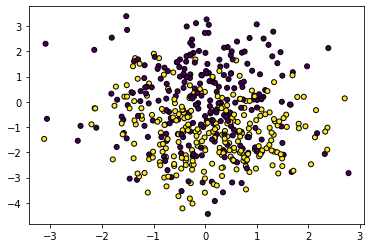

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#generate quite a lot of noise
#with only 4 informative features out of 10
#with 2 redundant features, overlapping with that 4 informative features
#and 4 noisy features
#Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

#look at the data...it is likely not linearly separable!

#### 1.2 Feature scale your data to reach faster convergence

In [3]:
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 1.3 Train test split your data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 2. Calculate the mean and std for each feature for each class

In [5]:
def mean_var(X_train, y_train):
    n = X_train.shape[1]
    mean = np.zeros((2, n))
    std = np.zeros((2, n))
    for label in [0, 1]:
        mean[label, :] = X_train[y_train==label].mean(axis=0)
        std[label, :] = X_train[y_train==label].std(axis=0)
    return mean, std

mean, std = mean_var(X_train, y_train)
assert mean.shape == (2, X_train.shape[1])
assert std.shape == (2, X_train.shape[1])

#### 3. Define the probability density function so we can later calculate $p(x \mid y)$

In [6]:
#scipy.stats.multivariate_normal is a library with this .pdf function
#but I just code from scratch for you to see
def gaussian_pdf(X, mean, std):
    left = 1/(np.sqrt(2*np.pi)*std)
    e = (X-mean)**2 / (2* (std **2))
    right = np.exp(-e)
    return left*right

#### 3. Calculate the likelihood by calculating the probability density of each class $p(x \mid y)$

In [7]:
#guassian pdf for class 0 and 1
#Note that I am using X_test, since p(x|y) is looking at "new" evidence
likelihood0 = gaussian_pdf(X_test, mean[0, :], std[0, :])
likelihood1 = gaussian_pdf(X_test, mean[1, :], std[0, :])

print(likelihood0.shape)

#pdf should have probability of each sample for each feature
assert likelihood0.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf0!"
assert likelihood1.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf1!"

(150, 10)


#### 3.1 Calculate thetotal likelihood by calculating the product of $p(x \mid y) = \prod_{i=1}^n p(x = i \mid y)$

In [8]:
#np.product
# P(feature1|class0) * P(feature2|class0)
total_likelihood0 = np.prod(likelihood0, axis=1)

# P(feature1|class1) * P(feature2|class1)
total_likelihood1 = np.prod(likelihood1, axis=1)

print(total_likelihood0.shape)

(150,)


#### 4. Calculate the prior $p(y)$

In [9]:
#probability for class 0 and 1
m0 = len(X_train[y_train==0])
m1 = len(X_train[y_train==1])
prior0 = m0 / (m0 + m1)
prior1 = m1 / (m0 + m1)

assert prior0 + prior1 == 1, "probability not equal 1"

#### 5. Calculate the posterior $p(x \mid y)p(y)$ for each class

In [10]:
#P(class0) * P(feature1|class0) * P(feature2|class0)
posterior0 = prior0 * total_likelihood0    
#P(class1) * P(feature1|class1) * P(feature2|class1)
posterior1 = prior1 * total_likelihood1

#### 6. Calculate accuracy

In [11]:
#if probability of class 1 is more than 0, then True
yhat = 1 * posterior1 > posterior0
    
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.7614950419527079
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.78      0.85      0.81        74
           1       0.84      0.76      0.80        76

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



### Sklearn

Of course, once we are able to code from scratch, we can turn to our sklearn so we don't need to implement from scratch from now.  Naive Bayes Gaussian is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
yhat = model.predict(X_test)
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.8354116059379219
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.81      0.93      0.87        74
           1       0.92      0.79      0.85        76

    accuracy                           0.86       150
   macro avg       0.87      0.86      0.86       150
weighted avg       0.87      0.86      0.86       150



We can also use predict_proba to print out the actual probabilities

In [14]:
yprob = model.predict_proba(X_test)
yprob[-8:].round(2)

array([[0.31, 0.69],
       [0.09, 0.91],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.51, 0.49],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.04, 0.96]])